/var/folders/d2/nvh7lrhj43bc5s3mjjwk4kxm0000gn/T/ipykernel_86103/2459066749.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['day'] = filtered_data['days_from_start']


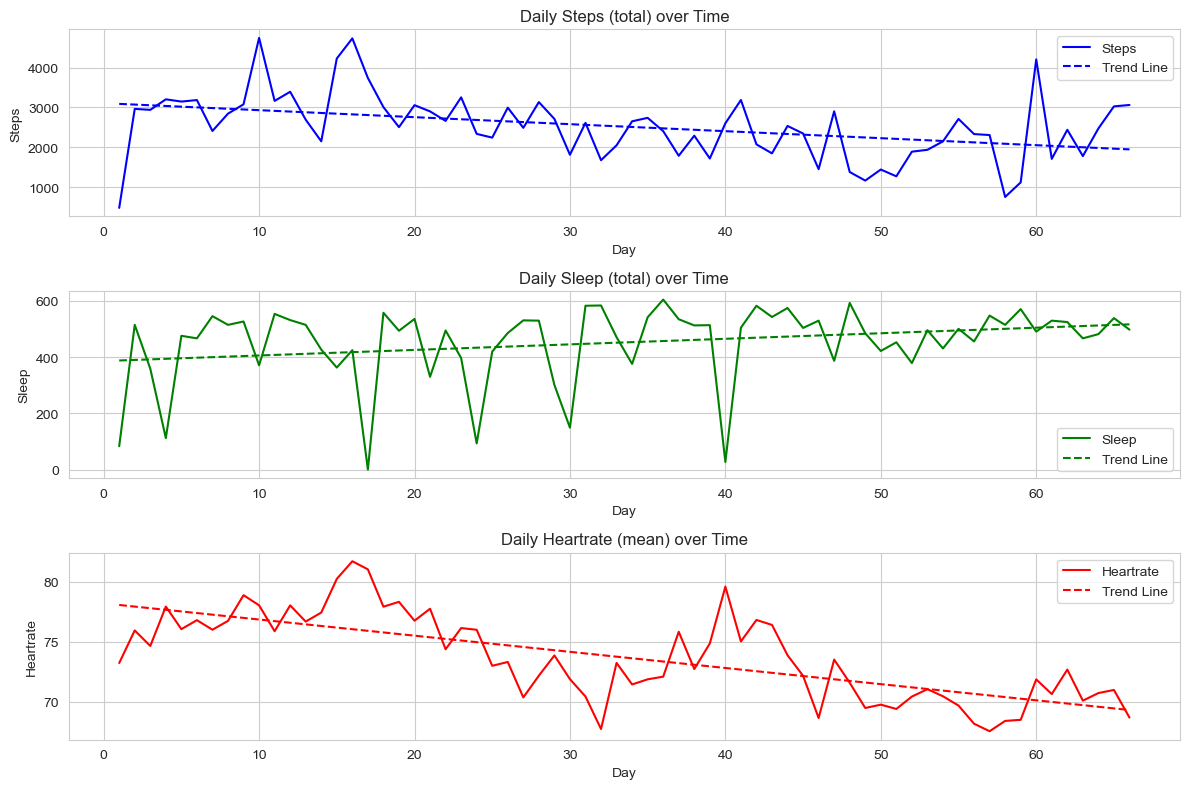

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date
all_data['days_from_start'] = all_data.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days + 1)

# Group by disease type and days_from_start, then calculate mean trends
grouped = all_data.groupby(['disease_type', 'days_from_start'])

# Calculate mean, std, and count
daily_data = grouped.agg({
    'steps': ['mean', 'std', 'count'],
    'sleep': ['mean', 'std', 'count'],
    'heartrate': ['mean', 'std', 'count']
}).reset_index()

# Flatten MultiIndex columns
daily_data.columns = ['disease_type', 'days_from_start', 'steps_mean', 'steps_std', 'steps_count', 'sleep_mean', 'sleep_std', 'sleep_count', 'heartrate_mean', 'heartrate_std', 'heartrate_count']

# Define colors for each disease type using a refined color palette
colors = {
    'Late Disease Stage': '#FF6F61',  # Coral
    'Early Disease Stage': '#6B5B95',  # Royal purple
    'Fast Disease Progression': '#88B04B'  # Olive green
}

# Filter data for a specific participant and exclude day 0
filtered_data = all_data[(all_data["participant_id"] == 1971) & (all_data["days_from_start"] != 0)]

# Aggregate daily data
filtered_data['day'] = filtered_data['days_from_start']
daily_data = filtered_data.groupby('day').agg({
    'steps': 'sum',
    'sleep': 'sum',
    'heartrate': 'mean'
}).reset_index()

# Plotting the trends with trend lines
plt.figure(figsize=(12, 8))

# Steps over time
plt.subplot(3, 1, 1)
plt.plot(daily_data['day'], daily_data['steps'], label='Steps', color='b')
# Adding trend line
steps_trend = np.polyfit(daily_data['day'], daily_data['steps'], 1)
plt.plot(daily_data['day'], np.polyval(steps_trend, daily_data['day']), color='b', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.title('Daily Steps (total) over Time')
plt.legend()

# Sleep over time
plt.subplot(3, 1, 2)
plt.plot(daily_data['day'], daily_data['sleep'], label='Sleep', color='g')
# Adding trend line
sleep_trend = np.polyfit(daily_data['day'], daily_data['sleep'], 1)
plt.plot(daily_data['day'], np.polyval(sleep_trend, daily_data['day']), color='g', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Sleep')
plt.title('Daily Sleep (total) over Time')
plt.legend()

# Heartrate over time
plt.subplot(3, 1, 3)
plt.plot(daily_data['day'], daily_data['heartrate'], label='Heartrate', color='r')
# Adding trend line
heartrate_trend = np.polyfit(daily_data['day'], daily_data['heartrate'], 1)
plt.plot(daily_data['day'], np.polyval(heartrate_trend, daily_data['day']), color='r', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Heartrate')
plt.title('Daily Heartrate (mean) over Time')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
daily_data

,day,steps,sleep,heartrate
0,1,476.674203,83,73.214530
1,2,2964.909776,515,75.936220
2,3,2940.422282,359,74.639559
3,4,3205.022117,112,77.929538
4,5,3148.742426,476,76.043738
...,...,...,...,...
61,62,2439.231564,525,72.665108
62,63,1778.608329,467,70.071288
63,64,2473.041600,482,70.705710
64,65,3027.927165,539,70.964534


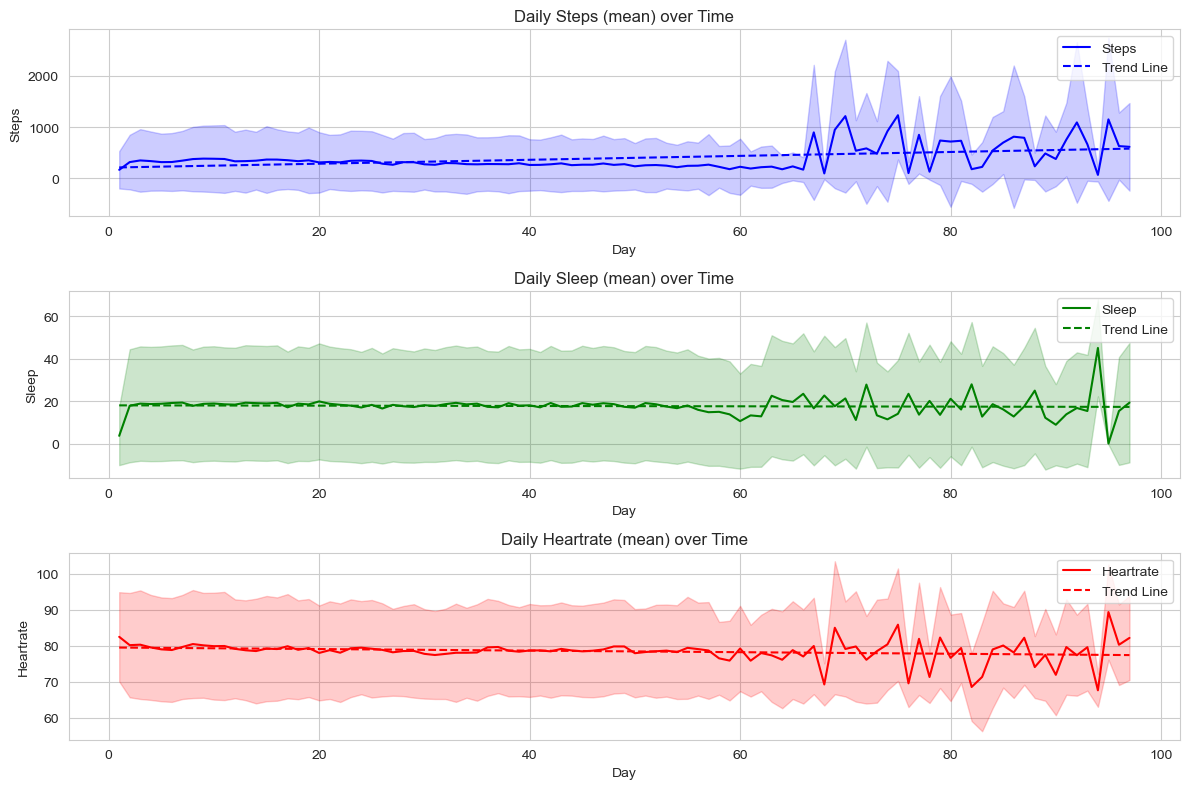

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date
all_data['days_from_start'] = all_data.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days + 1)

# Group by days_from_start to calculate mean trends across all participants
grouped = all_data.groupby('days_from_start')

# Calculate mean and std
daily_data = grouped.agg({
    'steps': ['mean', 'std'],
    'sleep': ['mean', 'std'],
    'heartrate': ['mean', 'std']
}).reset_index()

# Flatten MultiIndex columns
daily_data.columns = ['days_from_start', 'steps_mean', 'steps_std', 'sleep_mean', 'sleep_std', 'heartrate_mean', 'heartrate_std']

# Plotting the trends with trend lines
plt.figure(figsize=(12, 8))

# Steps over time
plt.subplot(3, 1, 1)
plt.plot(daily_data['days_from_start'], daily_data['steps_mean'], label='Steps', color='b')
plt.fill_between(daily_data['days_from_start'], daily_data['steps_mean'] - daily_data['steps_std'], daily_data['steps_mean'] + daily_data['steps_std'], color='b', alpha=0.2)
# Adding trend line
steps_trend = np.polyfit(daily_data['days_from_start'], daily_data['steps_mean'], 1)
plt.plot(daily_data['days_from_start'], np.polyval(steps_trend, daily_data['days_from_start']), color='b', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.title('Daily Steps (mean) over Time')
plt.legend()

# Sleep over time
plt.subplot(3, 1, 2)
plt.plot(daily_data['days_from_start'], daily_data['sleep_mean'], label='Sleep', color='g')
plt.fill_between(daily_data['days_from_start'], daily_data['sleep_mean'] - daily_data['sleep_std'], daily_data['sleep_mean'] + daily_data['sleep_std'], color='g', alpha=0.2)
# Adding trend line
sleep_trend = np.polyfit(daily_data['days_from_start'], daily_data['sleep_mean'], 1)
plt.plot(daily_data['days_from_start'], np.polyval(sleep_trend, daily_data['days_from_start']), color='g', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Sleep')
plt.title('Daily Sleep (mean) over Time')
plt.legend()

# Heartrate over time
plt.subplot(3, 1, 3)
plt.plot(daily_data['days_from_start'], daily_data['heartrate_mean'], label='Heartrate', color='r')
plt.fill_between(daily_data['days_from_start'], daily_data['heartrate_mean'] - daily_data['heartrate_std'], daily_data['heartrate_mean'] + daily_data['heartrate_std'], color='r', alpha=0.2)
# Adding trend line
heartrate_trend = np.polyfit(daily_data['days_from_start'], daily_data['heartrate_mean'], 1)
plt.plot(daily_data['days_from_start'], np.polyval(heartrate_trend, daily_data['days_from_start']), color='r', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Heartrate')
plt.title('Daily Heartrate (mean) over Time')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
all_data

,time,steps,sleep,heartrate,disease_type,participant_id,date,days_from_start
0,2021-01-08 00:00:00,0.000000,0,NaN,Late Disease Stage,3389,2021-01-08,1
1,2021-01-08 01:00:00,0.000000,0,NaN,Late Disease Stage,3389,2021-01-08,1
2,2021-01-08 02:00:00,0.000000,0,NaN,Late Disease Stage,3389,2021-01-08,1
3,2021-01-08 03:00:00,0.000000,0,NaN,Late Disease Stage,3389,2021-01-08,1
4,2021-01-08 04:00:00,0.000000,0,NaN,Late Disease Stage,3389,2021-01-08,1
...,...,...,...,...,...,...,...,...
1169,2021-11-14 17:00:00,178.388930,0,77.716002,Early Disease Stage,5977,2021-11-14,49
1170,2021-11-14 18:00:00,217.304400,0,82.268942,Early Disease Stage,5977,2021-11-14,49
1171,2021-11-14 19:00:00,130.873200,0,75.076669,Early Disease Stage,5977,2021-11-14,49
1172,2021-11-14 20:00:00,65.034546,0,77.724014,Early Disease Stage,5977,2021-11-14,49


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date
all_data['days_from_start'] = all_data.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days + 1)

# Remove rows where heartrate is NaN
all_data = all_data.dropna(subset=['heartrate'])

# Group by days_from_start to calculate mean trends across all participants
grouped = all_data.groupby('days_from_start')

# Calculate mean and std
daily_data = grouped.agg({
    'steps': ['mean', 'std'],
    'sleep': ['mean', 'std'],
    'heartrate': ['mean', 'std']
}).reset_index()

# Flatten MultiIndex columns
daily_data.columns = ['days_from_start', 'steps_mean', 'steps_std', 'sleep_mean', 'sleep_std', 'heartrate_mean', 'heartrate_std']

# Plotting the trends with trend lines
plt.figure(figsize=(12, 8))

# Steps over time
plt.subplot(3, 1, 1)
plt.plot(daily_data['days_from_start'], daily_data['steps_mean'], label='Steps', color='b')
plt.fill_between(daily_data['days_from_start'], daily_data['steps_mean'] - daily_data['steps_std'], daily_data['steps_mean'] + daily_data['steps_std'], color='b', alpha=0.2)
# Adding trend line
steps_trend = np.polyfit(daily_data['days_from_start'], daily_data['steps_mean'], 1)
plt.plot(daily_data['days_from_start'], np.polyval(steps_trend, daily_data['days_from_start']), color='b', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.title('Daily Steps (mean) over Time')
plt.legend()

# Sleep over time
plt.subplot(3, 1, 2)
plt.plot(daily_data['days_from_start'], daily_data['sleep_mean'], label='Sleep', color='g')
plt.fill_between(daily_data['days_from_start'], daily_data['sleep_mean'] - daily_data['sleep_std'], daily_data['sleep_mean'] + daily_data['sleep_std'], color='g', alpha=0.2)
# Adding trend line
sleep_trend = np.polyfit(daily_data['days_from_start'], daily_data['sleep_mean'], 1)
plt.plot(daily_data['days_from_start'], np.polyval(sleep_trend, daily_data['days_from_start']), color='g', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Sleep')
plt.title('Daily Sleep (mean) over Time')
plt.legend()

# Heartrate over time
plt.subplot(3, 1, 3)
plt.plot(daily_data['days_from_start'], daily_data['heartrate_mean'], label='Heartrate', color='r')
plt.fill_between(daily_data['days_from_start'], daily_data['heartrate_mean'] - daily_data['heartrate_std'], daily_data['heartrate_mean'] + daily_data['heartrate_std'], color='r', alpha=0.2)
# Adding trend line
heartrate_trend = np.polyfit(daily_data['days_from_start'], daily_data['heartrate_mean'], 1)
plt.plot(daily_data['days_from_start'], np.polyval(heartrate_trend, daily_data['days_from_start']), color='r', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Heartrate')
plt.title('Daily Heartrate (mean) over Time')
plt.legend()

plt.tight_layout()
plt.show()


AttributeError: 'SeriesGroupBy' object has no attribute 'total'

In [16]:
daily_data

,days_from_start,steps_mean,steps_std,sleep_mean,sleep_std,heartrate_mean,heartrate_std
0,1,330.647400,459.814781,7.230620,18.513682,82.475094,12.396047
1,2,336.861166,543.801051,18.593496,26.823059,80.164813,14.486489
2,3,359.252896,616.954051,19.437562,27.086128,80.294330,15.074534
3,4,346.085186,583.692318,19.257000,27.073047,79.532297,14.575326
4,5,320.107917,558.228539,19.011799,27.015668,79.000006,14.410435
...,...,...,...,...,...,...,...
92,93,663.282574,712.062997,15.375000,26.381503,79.591684,12.054198
93,94,65.983383,129.398416,45.000000,22.744326,67.627160,4.581964
94,95,1379.544824,1652.423440,0.100000,0.447214,89.353455,13.228592
95,96,628.452710,653.893650,15.375000,25.339113,80.272666,11.179622


In [19]:
all_data.groupby('days_from_start').sum()

/var/folders/d2/nvh7lrhj43bc5s3mjjwk4kxm0000gn/T/ipykernel_86103/3874316255.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('days_from_start').sum()


,steps,sleep,heartrate,participant_id
days_from_start,,,,
1,170614.058218,3731,42557.148639,3003989
2,331471.387008,18296,78882.175980,5681549
3,359612.149206,19457,80374.624004,5790148
4,346085.186071,19257,79532.297144,5844571
5,325549.751090,19335,80343.005756,5921821
...,...,...,...,...
93,15918.781774,369,1910.200408,68496
94,1583.601181,1080,1623.051847,68496
95,27590.896485,2,1787.069105,57080


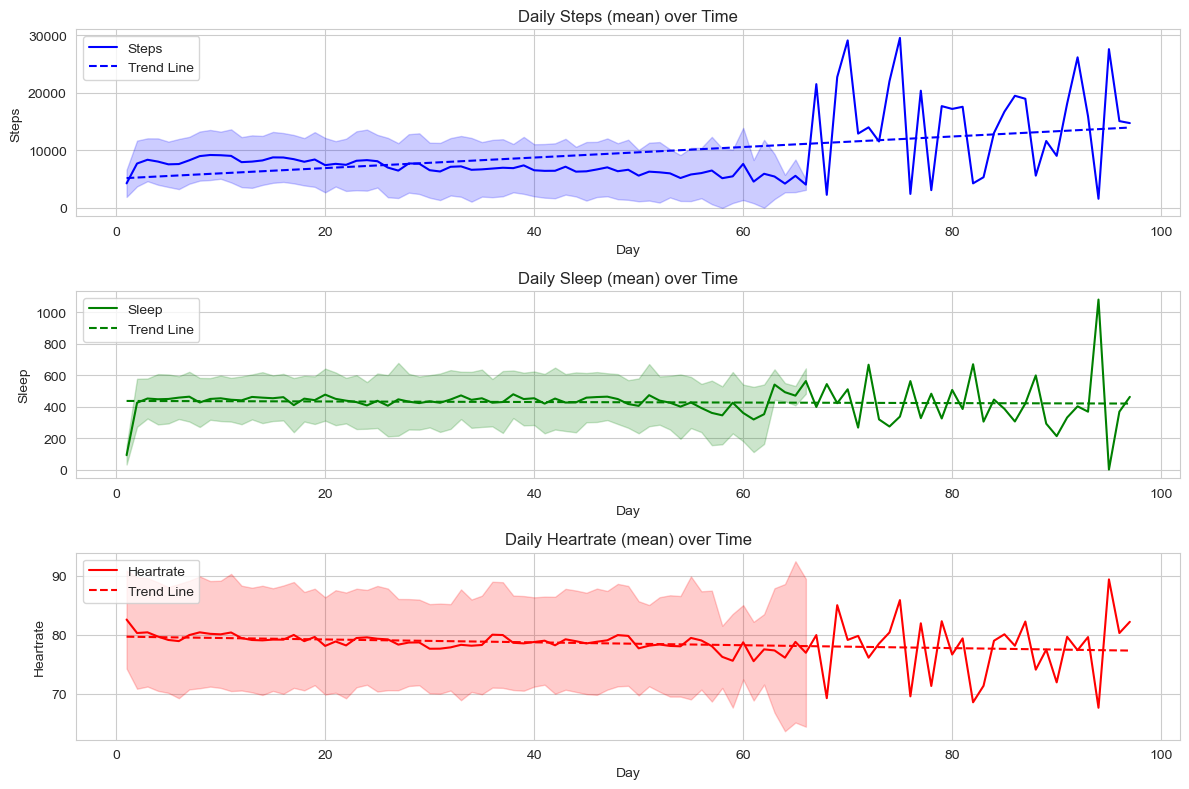

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date
all_data['days_from_start'] = all_data.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days + 1)

# Remove rows where heartrate is NaN
all_data = all_data.dropna(subset=['heartrate'])

# Group by participant_id and days_from_start to sum steps and sleep per participant per day
participant_daily_data = all_data.groupby(['participant_id', 'days_from_start']).agg({
    'steps': 'sum',
    'sleep': 'sum',
    'heartrate': 'mean'
}).reset_index()

# Now group by days_from_start to calculate the mean and std across participants
grouped = participant_daily_data.groupby('days_from_start').agg({
    'steps': ['mean', 'std'],
    'sleep': ['mean', 'std'],
    'heartrate': ['mean', 'std']
}).reset_index()

# Flatten MultiIndex columns
grouped.columns = ['days_from_start', 'steps_mean', 'steps_std', 'sleep_mean', 'sleep_std', 'heartrate_mean', 'heartrate_std']

# Plotting the trends with trend lines
plt.figure(figsize=(12, 8))

# Steps over time
plt.subplot(3, 1, 1)
plt.plot(grouped['days_from_start'], grouped['steps_mean'], label='Steps', color='b')
plt.fill_between(grouped['days_from_start'], grouped['steps_mean'] - grouped['steps_std'], grouped['steps_mean'] + grouped['steps_std'], color='b', alpha=0.2)
# Adding trend line
steps_trend = np.polyfit(grouped['days_from_start'], grouped['steps_mean'], 1)
plt.plot(grouped['days_from_start'], np.polyval(steps_trend, grouped['days_from_start']), color='b', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.title('Daily Steps (mean) over Time')
plt.legend()

# Sleep over time
plt.subplot(3, 1, 2)
plt.plot(grouped['days_from_start'], grouped['sleep_mean'], label='Sleep', color='g')
plt.fill_between(grouped['days_from_start'], grouped['sleep_mean'] - grouped['sleep_std'], grouped['sleep_mean'] + grouped['sleep_std'], color='g', alpha=0.2)
# Adding trend line
sleep_trend = np.polyfit(grouped['days_from_start'], grouped['sleep_mean'], 1)
plt.plot(grouped['days_from_start'], np.polyval(sleep_trend, grouped['days_from_start']), color='g', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Sleep')
plt.title('Daily Sleep (mean) over Time')
plt.legend()

# Heartrate over time
plt.subplot(3, 1, 3)
plt.plot(grouped['days_from_start'], grouped['heartrate_mean'], label='Heartrate', color='r')
plt.fill_between(grouped['days_from_start'], grouped['heartrate_mean'] - grouped['heartrate_std'], grouped['heartrate_mean'] + grouped['heartrate_std'], color='r', alpha=0.2)
# Adding trend line
heartrate_trend = np.polyfit(grouped['days_from_start'], grouped['heartrate_mean'], 1)
plt.plot(grouped['days_from_start'], np.polyval(heartrate_trend, grouped['days_from_start']), color='r', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Heartrate')
plt.title('Daily Heartrate (mean) over Time')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
participant_daily_data

,participant_id,days_from_start,steps,sleep,heartrate
0,1120,1,3513.330528,0,90.819585
1,1120,2,6749.318241,356,92.041697
2,1120,3,6311.257864,495,92.094506
3,1120,4,6345.329775,427,93.197412
4,1120,5,7119.506445,10,92.834636
...,...,...,...,...,...
2377,9926,44,11201.923774,483,74.820991
2378,9926,45,7047.087136,442,72.960026
2379,9926,46,8058.076048,500,72.140040
2380,9926,47,6716.914034,579,71.478733


In [23]:
grouped

,days_from_start,steps_mean,steps_std,sleep_mean,sleep_std,heartrate_mean,heartrate_std
0,1,4265.351455,2363.482053,93.275000,59.088802,82.558144,8.298303
1,2,7708.636907,3980.351033,425.488372,152.270807,80.278748,9.430680
2,3,8363.073237,3724.550403,452.488372,126.884532,80.393227,9.175280
3,4,8048.492699,4029.668550,447.837209,159.611721,79.678702,9.186804
4,5,7570.924444,3942.870841,449.651163,155.290187,79.099973,8.950381
...,...,...,...,...,...,...,...
92,93,15918.781774,NaN,369.000000,NaN,79.591684,NaN
93,94,1583.601181,NaN,1080.000000,NaN,67.627160,NaN
94,95,27590.896485,NaN,2.000000,NaN,89.353455,NaN
95,96,15082.865046,NaN,369.000000,NaN,80.272666,NaN


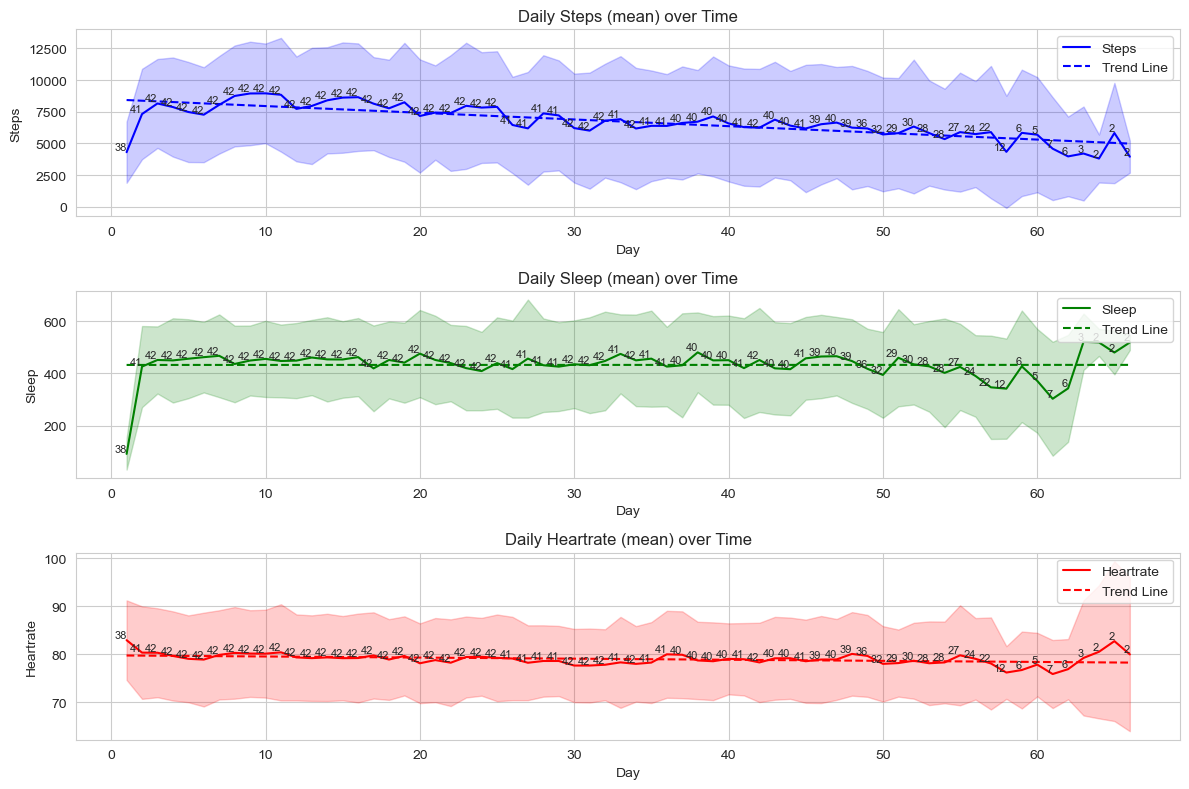

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

skip_participant = [4063, 2854]    

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    if participant_id in skip_participant:
        continue
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date
all_data['days_from_start'] = all_data.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days + 1)

# Remove rows where heartrate is NaN
all_data = all_data.dropna(subset=['heartrate'])

# Group by participant_id and days_from_start to sum steps and sleep per participant per day
participant_daily_data = all_data.groupby(['participant_id', 'days_from_start']).agg({
    'steps': 'sum',
    'sleep': 'sum',
    'heartrate': 'mean'
}).reset_index()

# Now group by days_from_start to calculate the mean, std, and count (N) across participants
grouped = participant_daily_data.groupby('days_from_start').agg({
    'steps': ['mean', 'std', 'count'],
    'sleep': ['mean', 'std', 'count'],
    'heartrate': ['mean', 'std', 'count']
}).reset_index()

# Flatten MultiIndex columns
grouped.columns = ['days_from_start', 'steps_mean', 'steps_std', 'steps_N', 'sleep_mean', 'sleep_std', 'sleep_N', 'heartrate_mean', 'heartrate_std', 'heartrate_N']

# Plotting the trends with trend lines
plt.figure(figsize=(12, 8))

# Steps over time
plt.subplot(3, 1, 1)
plt.plot(grouped['days_from_start'], grouped['steps_mean'], label='Steps', color='b')
plt.fill_between(grouped['days_from_start'], grouped['steps_mean'] - grouped['steps_std'], grouped['steps_mean'] + grouped['steps_std'], color='b', alpha=0.2)
# Adding trend line
steps_trend = np.polyfit(grouped['days_from_start'], grouped['steps_mean'], 1)
plt.plot(grouped['days_from_start'], np.polyval(steps_trend, grouped['days_from_start']), color='b', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.title('Daily Steps (mean) over Time')
plt.legend()

# Sleep over time
plt.subplot(3, 1, 2)
plt.plot(grouped['days_from_start'], grouped['sleep_mean'], label='Sleep', color='g')
plt.fill_between(grouped['days_from_start'], grouped['sleep_mean'] - grouped['sleep_std'], grouped['sleep_mean'] + grouped['sleep_std'], color='g', alpha=0.2)
# Adding trend line
sleep_trend = np.polyfit(grouped['days_from_start'], grouped['sleep_mean'], 1)
plt.plot(grouped['days_from_start'], np.polyval(sleep_trend, grouped['days_from_start']), color='g', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Sleep')
plt.title('Daily Sleep (mean) over Time')
plt.legend()

# Heartrate over time
plt.subplot(3, 1, 3)
plt.plot(grouped['days_from_start'], grouped['heartrate_mean'], label='Heartrate', color='r')
plt.fill_between(grouped['days_from_start'], grouped['heartrate_mean'] - grouped['heartrate_std'], grouped['heartrate_mean'] + grouped['heartrate_std'], color='r', alpha=0.2)
# Adding trend line
heartrate_trend = np.polyfit(grouped['days_from_start'], grouped['heartrate_mean'], 1)
plt.plot(grouped['days_from_start'], np.polyval(heartrate_trend, grouped['days_from_start']), color='r', linestyle='--', label='Trend Line')
plt.xlabel('Day')
plt.ylabel('Heartrate')
plt.title('Daily Heartrate (mean) over Time')
plt.legend()

# Show participant count (N) in the plots
for i, row in grouped.iterrows():
    plt.subplot(3, 1, 1)
    plt.text(row['days_from_start'], row['steps_mean'], str(int(row['steps_N'])), fontsize=8, verticalalignment='bottom', horizontalalignment='right')
    
    plt.subplot(3, 1, 2)
    plt.text(row['days_from_start'], row['sleep_mean'], str(int(row['sleep_N'])), fontsize=8, verticalalignment='bottom', horizontalalignment='right')
    
    plt.subplot(3, 1, 3)
    plt.text(row['days_from_start'], row['heartrate_mean'], str(int(row['heartrate_N'])), fontsize=8, verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.show()


In [37]:
grouped

,days_from_start,steps_mean,steps_std,steps_N,sleep_mean,sleep_std,sleep_N,heartrate_mean,heartrate_std,heartrate_N
0,1,4313.257252,2412.010629,38,92.684211,59.869726,38,82.956963,8.296936,38
1,2,7320.204135,3564.529689,41,426.268293,154.946124,41,80.358426,9.646970,41
2,3,8154.346273,3505.931127,42,451.500000,128.254939,42,80.333596,9.278062,42
3,4,7872.083007,3906.848885,42,449.857143,160.989255,42,79.666815,9.297829,42
4,5,7481.605561,3946.389704,42,456.238095,150.970327,42,79.065476,9.055980,42
...,...,...,...,...,...,...,...,...,...,...
61,62,3979.999380,3141.327072,6,343.000000,204.346764,6,76.908108,6.284410,6
62,63,4207.434668,3704.447860,3,521.000000,107.684725,3,79.250085,12.003972,3
63,64,3811.686646,1893.129979,2,518.500000,51.618795,2,80.529556,13.893017,2
64,65,5823.977617,3954.212469,2,480.000000,83.438600,2,82.751501,16.669289,2


In [27]:
grouped["steps_N"]

0     40
1     43
2     43
3     43
4     43
      ..
92     1
93     1
94     1
95     1
96     1
Name: steps_N, Length: 97, dtype: int64

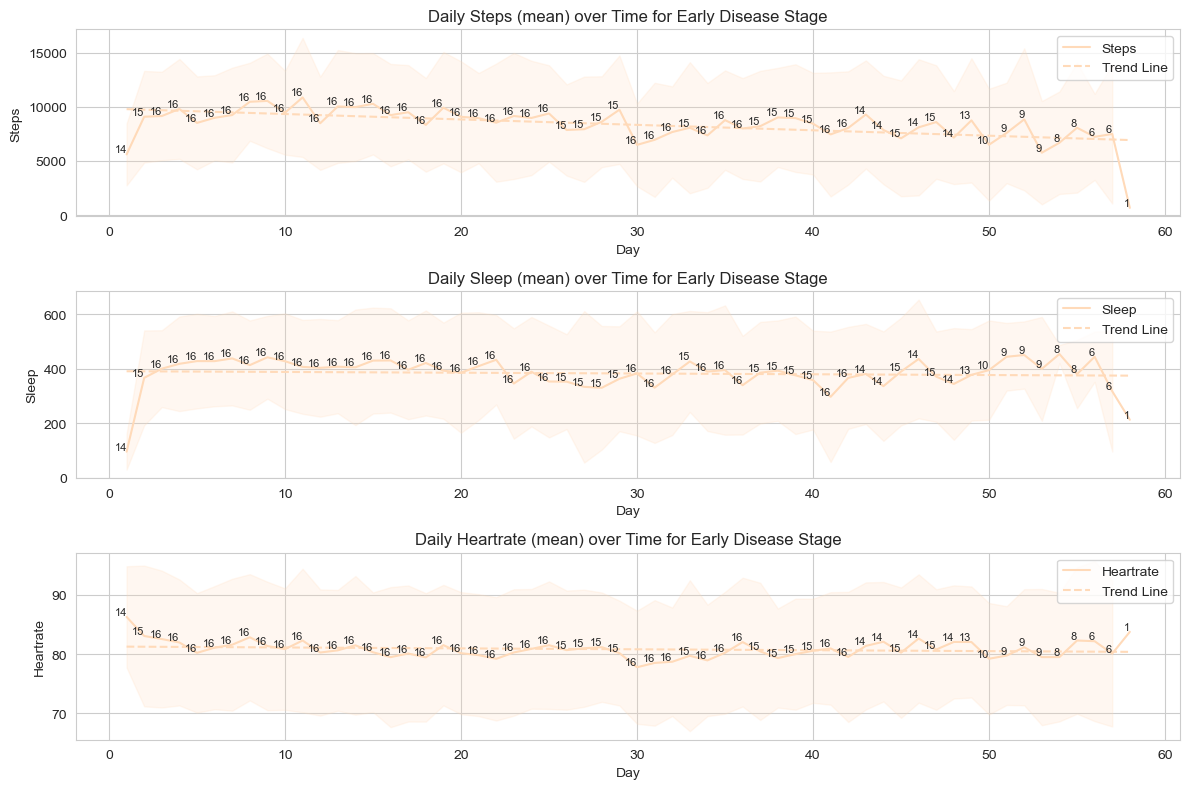

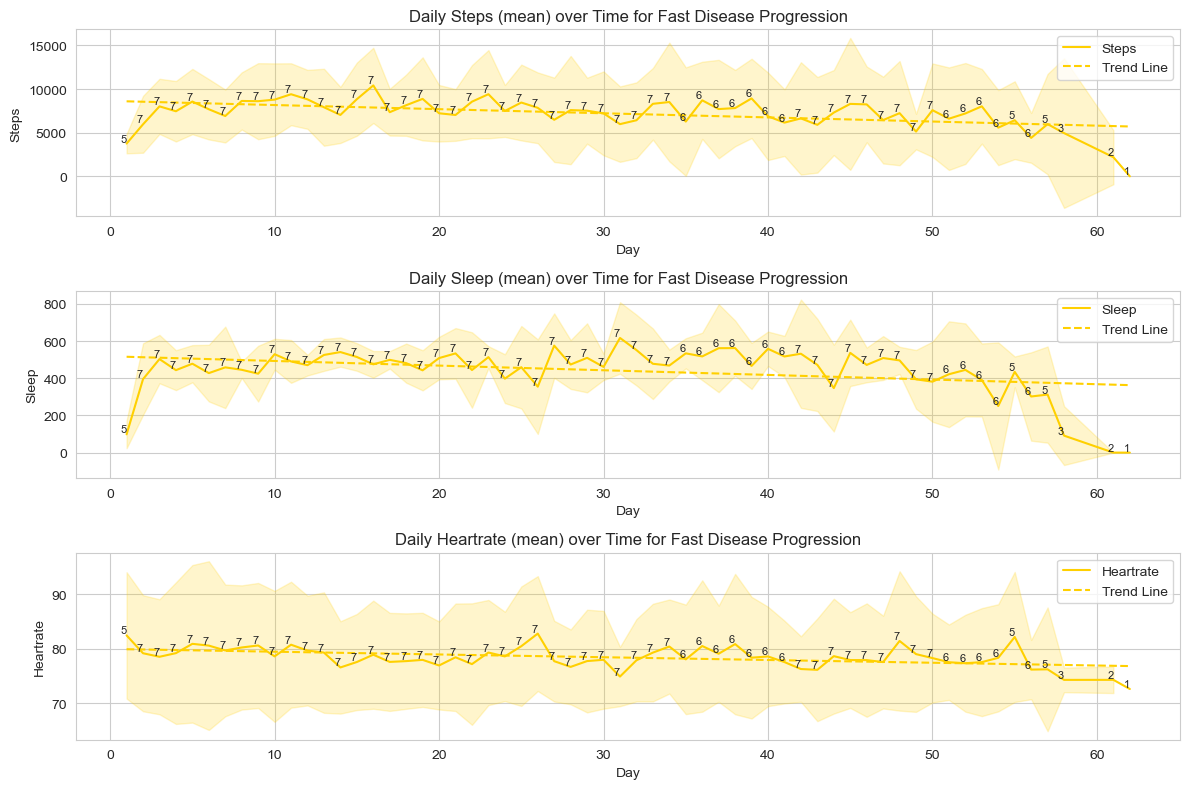

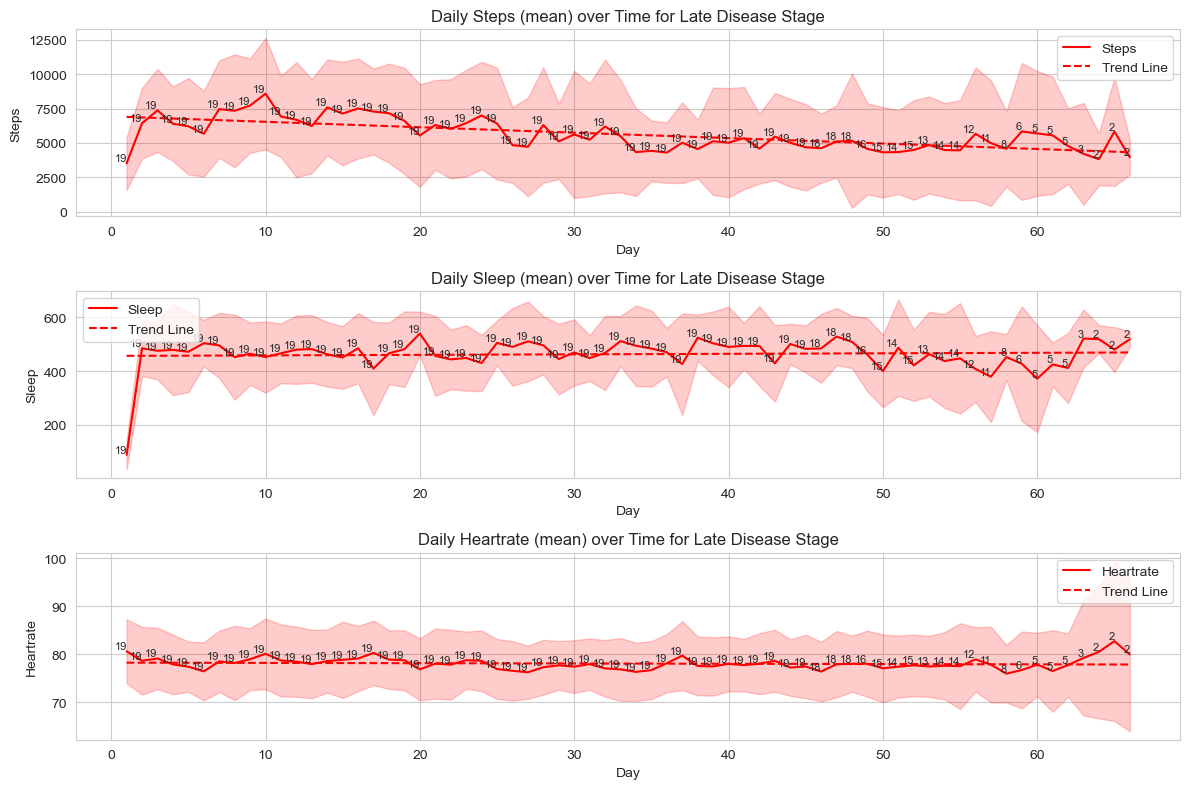

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

skip_participant = [4063, 2854]

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    if participant_id in skip_participant:
        continue
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date
all_data['days_from_start'] = all_data.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days + 1)

# Remove rows where heartrate is NaN
all_data = all_data.dropna(subset=['heartrate'])

# Group by participant_id, disease_type, and days_from_start to sum steps and sleep per participant per day
participant_daily_data = all_data.groupby(['participant_id', 'disease_type', 'days_from_start']).agg({
    'steps': 'sum',
    'sleep': 'sum',
    'heartrate': 'mean'
}).reset_index()

# Now group by disease_type and days_from_start to calculate the mean, std, and count (N) across participants
grouped = participant_daily_data.groupby(['disease_type', 'days_from_start']).agg({
    'steps': ['mean', 'std', 'count'],
    'sleep': ['mean', 'std', 'count'],
    'heartrate': ['mean', 'std', 'count']
}).reset_index()

# Flatten MultiIndex columns
grouped.columns = ['disease_type', 'days_from_start', 'steps_mean', 'steps_std', 'steps_N', 'sleep_mean', 'sleep_std', 'sleep_N', 'heartrate_mean', 'heartrate_std', 'heartrate_N']

# Define colors for each disease type using a refined color palette
colors = {
    'Early Disease Stage': '#FFDAB9',
    'Fast Disease Progression': '#FFD000',
    'Late Disease Stage': '#FF0000'
}

# Plotting the trends with trend lines for each disease type
for disease_type, color in colors.items():
    disease_data = grouped[grouped['disease_type'] == disease_type]

    plt.figure(figsize=(12, 8))

    # Steps over time
    plt.subplot(3, 1, 1)
    plt.plot(disease_data['days_from_start'], disease_data['steps_mean'], label='Steps', color=color)
    plt.fill_between(disease_data['days_from_start'], disease_data['steps_mean'] - disease_data['steps_std'], disease_data['steps_mean'] + disease_data['steps_std'], color=color, alpha=0.2)
    # Adding trend line
    steps_trend = np.polyfit(disease_data['days_from_start'], disease_data['steps_mean'], 1)
    plt.plot(disease_data['days_from_start'], np.polyval(steps_trend, disease_data['days_from_start']), color=color, linestyle='--', label='Trend Line')
    plt.xlabel('Day')
    plt.ylabel('Steps')
    plt.title(f'Daily Steps (mean) over Time for {disease_type}')
    plt.legend()

    # Sleep over time
    plt.subplot(3, 1, 2)
    plt.plot(disease_data['days_from_start'], disease_data['sleep_mean'], label='Sleep', color=color)
    plt.fill_between(disease_data['days_from_start'], disease_data['sleep_mean'] - disease_data['sleep_std'], disease_data['sleep_mean'] + disease_data['sleep_std'], color=color, alpha=0.2)
    # Adding trend line
    sleep_trend = np.polyfit(disease_data['days_from_start'], disease_data['sleep_mean'], 1)
    plt.plot(disease_data['days_from_start'], np.polyval(sleep_trend, disease_data['days_from_start']), color=color, linestyle='--', label='Trend Line')
    plt.xlabel('Day')
    plt.ylabel('Sleep')
    plt.title(f'Daily Sleep (mean) over Time for {disease_type}')
    plt.legend()

    # Heartrate over time
    plt.subplot(3, 1, 3)
    plt.plot(disease_data['days_from_start'], disease_data['heartrate_mean'], label='Heartrate', color=color)
    plt.fill_between(disease_data['days_from_start'], disease_data['heartrate_mean'] - disease_data['heartrate_std'], disease_data['heartrate_mean'] + disease_data['heartrate_std'], color=color, alpha=0.2)
    # Adding trend line
    heartrate_trend = np.polyfit(disease_data['days_from_start'], disease_data['heartrate_mean'], 1)
    plt.plot(disease_data['days_from_start'], np.polyval(heartrate_trend, disease_data['days_from_start']), color=color, linestyle='--', label='Trend Line')
    plt.xlabel('Day')
    plt.ylabel('Heartrate')
    plt.title(f'Daily Heartrate (mean) over Time for {disease_type}')
    plt.legend()

    # Show participant count (N) in the plots
    for i, row in disease_data.iterrows():
        plt.subplot(3, 1, 1)
        plt.text(row['days_from_start'], row['steps_mean'], str(int(row['steps_N'])), fontsize=8, verticalalignment='bottom', horizontalalignment='right')

        plt.subplot(3, 1, 2)
        plt.text(row['days_from_start'], row['sleep_mean'], str(int(row['sleep_N'])), fontsize=8, verticalalignment='bottom', horizontalalignment='right')

        plt.subplot(3, 1, 3)
        plt.text(row['days_from_start'], row['heartrate_mean'], str(int(row['heartrate_N'])), fontsize=8, verticalalignment='bottom', horizontalalignment='right')

    plt.tight_layout()
    plt.show()


In [75]:
print(grouped[grouped['disease_type'] == "Early Disease Stage"][["steps_mean","sleep_mean","heartrate_mean"]].mean())
print(grouped[grouped['disease_type'] == "Early Disease Stage"][["steps_mean","sleep_mean","heartrate_mean"]].std())

steps_mean        8356.238698
sleep_mean         383.014870
heartrate_mean      80.819408
dtype: float64
steps_mean        1547.584219
sleep_mean          57.853085
heartrate_mean       1.433732
dtype: float64


In [76]:
print(grouped[grouped['disease_type'] == "Fast Disease Progression"][["steps_mean","sleep_mean","heartrate_mean"]].mean())
print(grouped[grouped['disease_type'] == "Fast Disease Progression"][["steps_mean","sleep_mean","heartrate_mean"]].std())

steps_mean        7198.379421
sleep_mean         441.316746
heartrate_mean      78.428184
dtype: float64
steps_mean        1723.198535
sleep_mean         127.112087
heartrate_mean       1.960138
dtype: float64


In [77]:
print(grouped[grouped['disease_type'] == "Late Disease Stage"][["steps_mean","sleep_mean","heartrate_mean"]].mean())
print(grouped[grouped['disease_type'] == "Late Disease Stage"][["steps_mean","sleep_mean","heartrate_mean"]].std())

steps_mean        5608.036818
sleep_mean         462.835338
heartrate_mean      78.070992
dtype: float64
steps_mean        1139.864602
sleep_mean          58.989627
heartrate_mean       1.211084
dtype: float64


In [78]:
print(grouped[["steps_mean","sleep_mean","heartrate_mean"]].mean())
print(grouped[["steps_mean","sleep_mean","heartrate_mean"]].std())

steps_mean        6992.907825
sleep_mean         430.657606
heartrate_mean      79.053816
dtype: float64
steps_mean        1859.961488
sleep_mean          92.832147
heartrate_mean       1.965875
dtype: float64


In [49]:
import pandas as pd
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a dictionary to store data for each participant
participant_data = {}

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    if participant_id in skip_participant:
        continue
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        participant_data[participant_id] = data

# Normalize the start times and calculate durations
for participant_id, data in participant_data.items():
    data['time'] = (data['time'] - data['time'].min()).dt.total_seconds() / 86400  # Convert to days

# Calculate the duration of data collection for each participant
participant_durations = {participant_id: data['time'].max() for participant_id, data in participant_data.items()}

# Calculate overall statistics
durations = list(participant_durations.values())
min_duration = min(durations)
max_duration = max(durations)
mean_duration = sum(durations) / len(durations)
std_dev_duration = (sum((x - mean_duration) ** 2 for x in durations) / len(durations)) ** 0.5
count = len(durations)

print(f"Count (N): {count}")
print(f"Min Duration: {min_duration:.2f} days")
print(f"Max Duration: {max_duration:.2f} days")
print(f"Mean Duration: {mean_duration:.2f} days")
print(f"Standard Deviation: {std_dev_duration:.2f} days")

# Calculate mean and standard deviation of participation durations for each disease type
disease_durations = {}
for participant_id, data in participant_data.items():
    disease_type = data['disease_type'].iloc[0]
    duration = data['time'].max()
    if disease_type not in disease_durations:
        disease_durations[disease_type] = []
    disease_durations[disease_type].append(duration)

for disease_type, durations in disease_durations.items():
    count = len(durations)
    mean_duration = pd.Series(durations).mean()
    std_dev_duration = pd.Series(durations).std()
    print(f"{disease_type}: Count (N) = {count}, Mean Duration = {mean_duration:.2f} days, Std Dev = {std_dev_duration:.2f} days")


Count (N): 42
Min Duration: 41.29 days
Max Duration: 65.96 days
Mean Duration: 55.08 days
Standard Deviation: 5.48 days
Late Disease Stage: Count (N) = 19, Mean Duration = 56.68 days, Std Dev = 5.67 days
Early Disease Stage: Count (N) = 16, Mean Duration = 52.17 days, Std Dev = 4.89 days
Fast Disease Progression: Count (N) = 7, Mean Duration = 57.35 days, Std Dev = 4.14 days


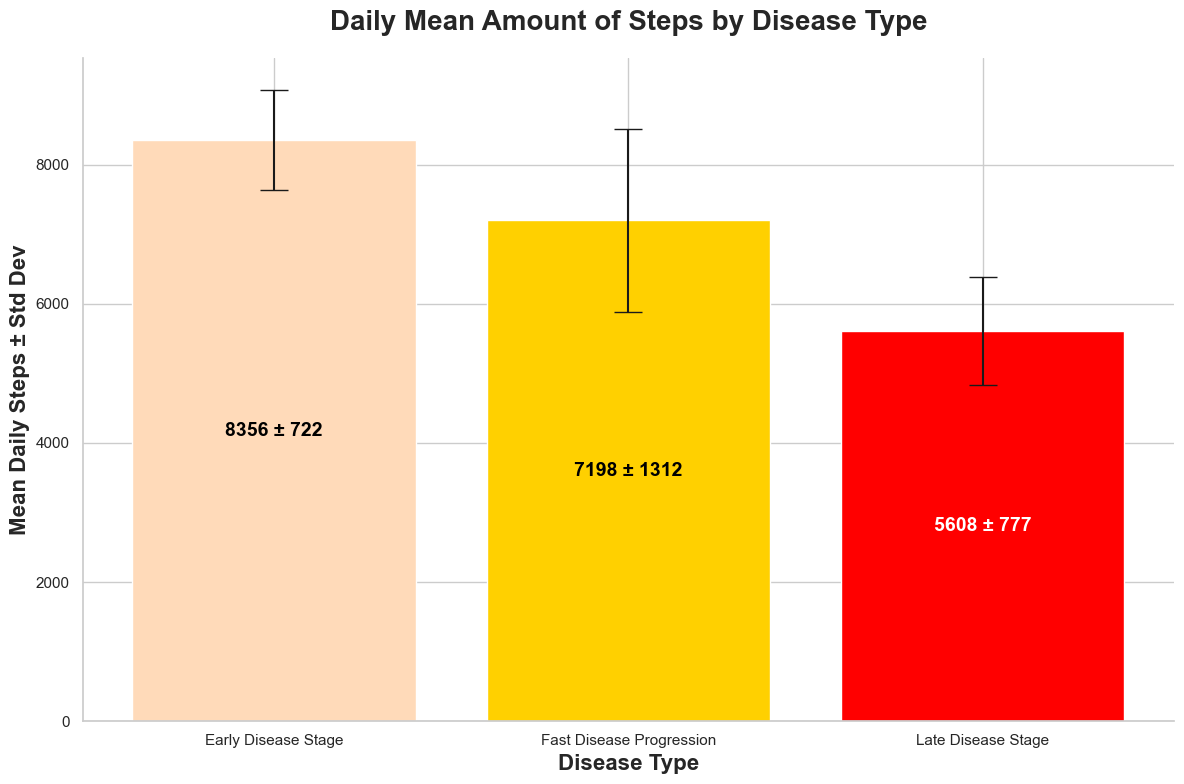

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'daily_summary' is already loaded as a DataFrame
# Example:
# daily_summary = pd.read_csv('path_to_daily_summary.csv')

# Define colors for each disease type using a refined color palette
colors = {
    'Early Disease Stage': '#FFDAB9',
    'Fast Disease Progression': '#FFD000',
    'Late Disease Stage': '#FF0000'
}

# Aggregate the data to get the overall mean and standard deviation for each disease type
agg_data = grouped.groupby('disease_type').agg({
    'steps_mean': 'mean',
    'steps_std': 'std'
}).reset_index()

# Use seaborn's set_theme to give the plot a modern look
sns.set_theme(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(agg_data['disease_type'], agg_data['steps_mean'], yerr=agg_data['steps_std'], capsize=10, color=[colors[d] for d in agg_data['disease_type']])

# Set titles and labels
ax.set_title('Daily Mean Amount of Steps by Disease Type', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Disease Type', fontsize=16, weight='bold')
ax.set_ylabel('Mean Daily Steps ± Std Dev', fontsize=16, weight='bold')

# Add text labels in the center of the bars
i = 0
for bar, mean, std in zip(bars, agg_data['steps_mean'], agg_data['steps_std']):
    label = f'{int(round(mean, 0))} ± {int(round(std, 0))}'
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, label, ha='center', va='center', fontsize=14, color=["black","black","white"][i], weight='bold')
    i += 1

# Add a custom legend
#handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
#labels = colors.keys()
#ax.legend(handles, labels, title="Disease Type", loc='upper right', fontsize=12, title_fontsize='13', frameon=True, fancybox=True, shadow=True, borderpad=1)

# Remove top and right spines for a cleaner look
sns.despine()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [82]:
# ANOVA significance
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


model = ols('steps_mean ~ C(disease_type)', data=grouped).fit()
anova_results = anova_lm(model)

print("ANOVA Results")
print(anova_results)

# Check if ANOVA is significant
if anova_results['PR(>F)'][0] < 0.05:
    print("There is a significant difference between the groups. Performing post hoc tests.")
    
    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(endog=grouped['steps_mean'], groups=grouped['disease_type'], alpha=0.05)
    print(tukey_result)
else:
    print("No significant difference found between the groups.")

# Save the ANOVA results to a CSV file if needed
anova_results.to_csv('anova_results.csv')

ANOVA Results
                    df        sum_sq       mean_sq          F        PR(>F)
C(disease_type)    2.0  2.369153e+08  1.184577e+08  54.120935  3.765096e-19
Residual         181.0  3.961653e+08  2.188758e+06        NaN           NaN
There is a significant difference between the groups. Performing post hoc tests.
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
         group1                   group2           meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------------------------
     Early Disease Stage Fast Disease Progression -1157.8593 0.0001 -1801.6468  -514.0718   True
     Early Disease Stage       Late Disease Stage -2748.2019   -0.0 -3377.4415 -2118.9623   True
Fast Disease Progression       Late Disease Stage -1590.3426    0.0 -2213.9753  -966.7099   True
-----------------------------------------------------------------------------------------------

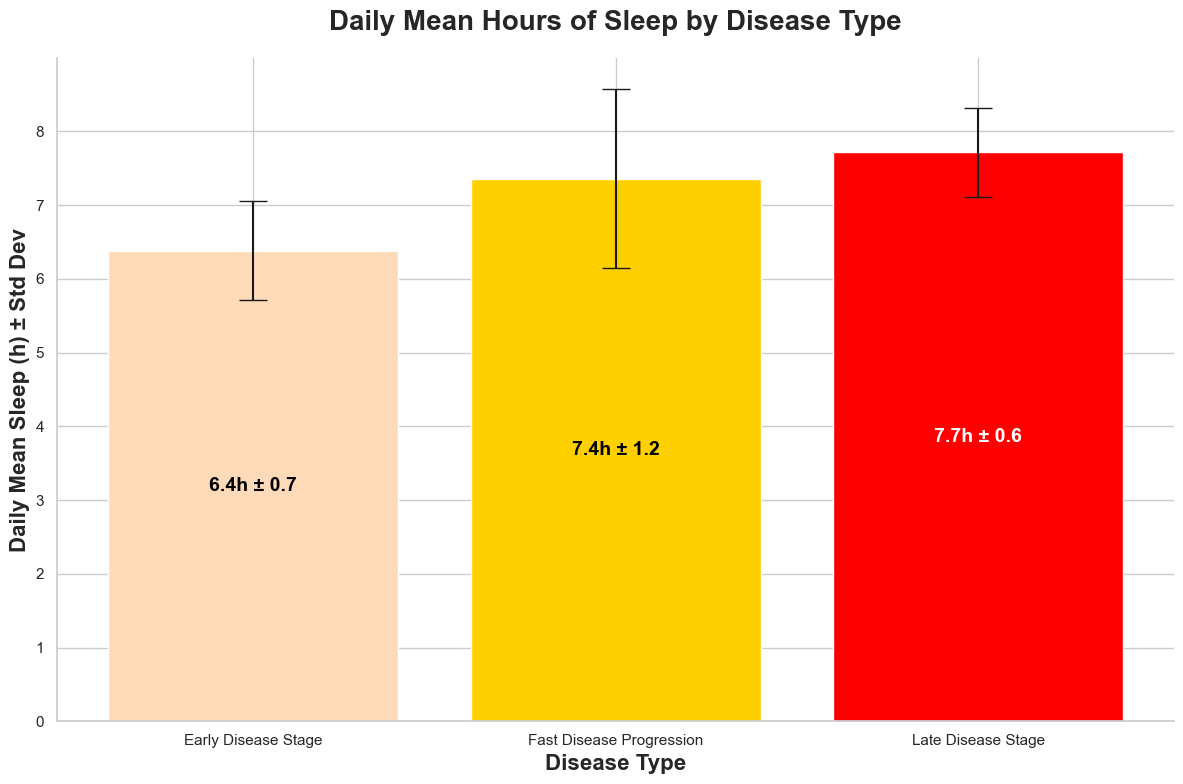

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'daily_summary' is already loaded as a DataFrame
# Example:
# daily_summary = pd.read_csv('path_to_daily_summary.csv')

# Define colors for each disease type using a refined color palette
colors = {
    'Early Disease Stage': '#FFDAB9',
    'Fast Disease Progression': '#FFD000',
    'Late Disease Stage': '#FF0000'
}

# Convert sleep_mean and sleep_std from minutes to hours
grouped['sleep_mean_hours'] = grouped['sleep_mean'] / 60
grouped['sleep_std_hours'] = grouped['sleep_std'] / 60

# Aggregate the data to get the overall mean and standard deviation for each disease type
agg_data = grouped.groupby('disease_type').agg({
    'sleep_mean_hours': 'mean',
    'sleep_std_hours': 'std'
}).reset_index()

# Use seaborn's set_theme to give the plot a modern look
sns.set_theme(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(agg_data['disease_type'], agg_data['sleep_mean_hours'], yerr=agg_data['sleep_std_hours'], capsize=10, color=[colors[d] for d in agg_data['disease_type']])

# Set titles and labels
ax.set_title('Daily Mean Hours of Sleep by Disease Type', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Disease Type', fontsize=16, weight='bold')
ax.set_ylabel('Daily Mean Sleep (h) ± Std Dev', fontsize=16, weight='bold')

# Add text labels in the center of the bars
i = 0
for bar, mean, std in zip(bars, agg_data['sleep_mean_hours'], agg_data['sleep_std_hours']):
    label = f'{mean:.1f}h ± {std:.1f}'
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, label, ha='center', va='center', fontsize=14, color=["black","black","white"][i], weight='bold')
    i += 1

# Remove top and right spines for a cleaner look
sns.despine()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [83]:
# ANOVA significance
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


model = ols('steps_mean ~ C(disease_type)', data=grouped).fit()
anova_results = anova_lm(model)

print("ANOVA Results")
print(anova_results)

# Check if ANOVA is significant
if anova_results['PR(>F)'][0] < 0.05:
    print("There is a significant difference between the groups. Performing post hoc tests.")
    
    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(endog=grouped['sleep_mean'], groups=grouped['disease_type'], alpha=0.05)
    print(tukey_result)
else:
    print("No significant difference found between the groups.")

# Save the ANOVA results to a CSV file if needed
anova_results.to_csv('anova_results.csv')

ANOVA Results
                    df        sum_sq       mean_sq          F        PR(>F)
C(disease_type)    2.0  2.369153e+08  1.184577e+08  54.120935  3.765096e-19
Residual         181.0  3.961653e+08  2.188758e+06        NaN           NaN
There is a significant difference between the groups. Performing post hoc tests.
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------
     Early Disease Stage Fast Disease Progression  58.3019  0.001  20.4397  96.164   True
     Early Disease Stage       Late Disease Stage  79.8205    0.0  42.8139 116.827   True
Fast Disease Progression       Late Disease Stage  21.5186 0.3501 -15.1582 58.1954  False
-----------------------------------------------------------------------------------------


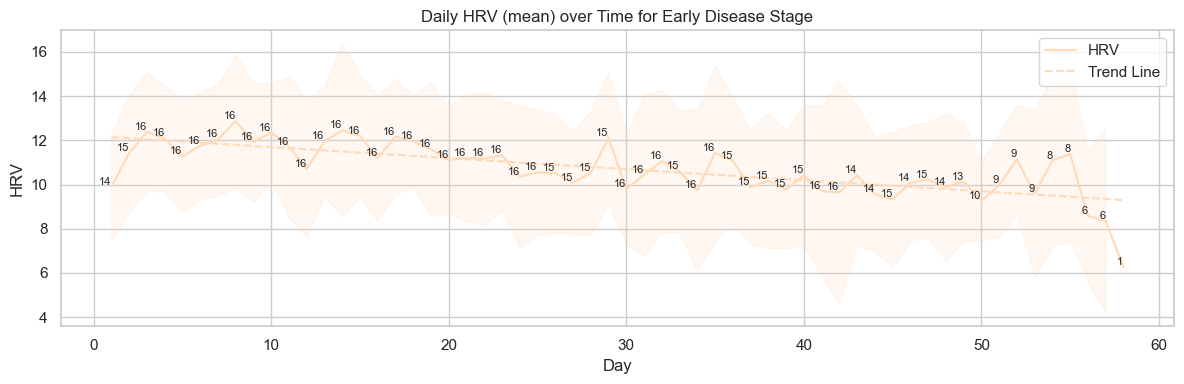

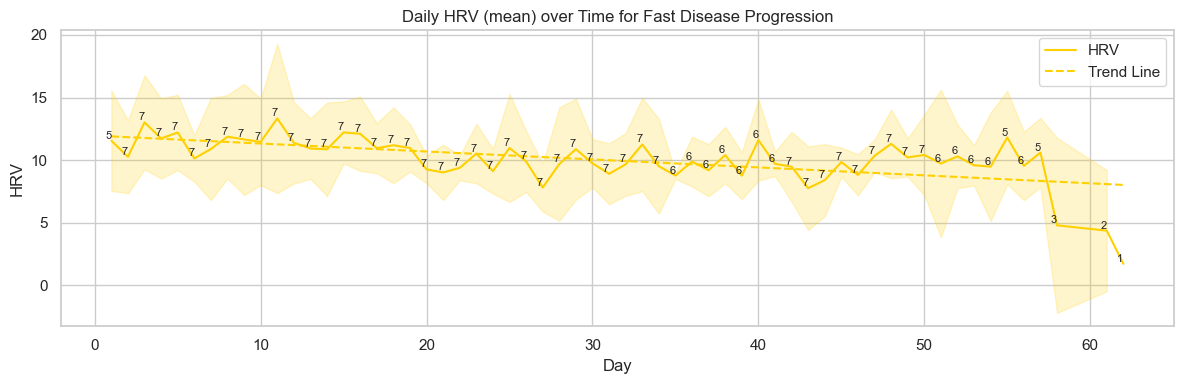

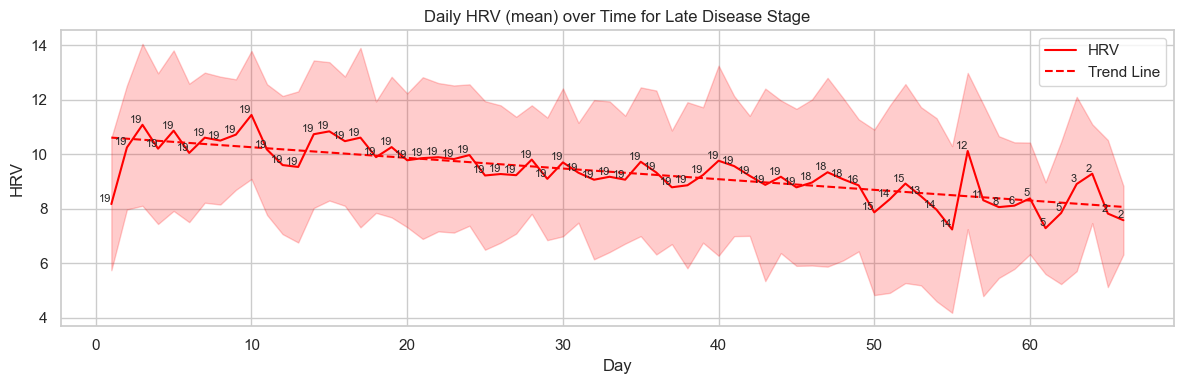

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

skip_participant = [4063, 2854]

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    if participant_id in skip_participant:
        continue
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date
all_data['days_from_start'] = all_data.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days + 1)

# Remove rows where heartrate is NaN
all_data = all_data.dropna(subset=['heartrate'])

# Compute HRV as the standard deviation of heartrate for each participant per day
participant_daily_data = all_data.groupby(['participant_id', 'disease_type', 'days_from_start']).agg({
    'heartrate': 'std'
}).reset_index().rename(columns={'heartrate': 'hrv'})

# Now group by disease_type and days_from_start to calculate the mean, std, and count (N) across participants
grouped = participant_daily_data.groupby(['disease_type', 'days_from_start']).agg({
    'hrv': ['mean', 'std', 'count']
}).reset_index()

# Flatten MultiIndex columns
grouped.columns = ['disease_type', 'days_from_start', 'hrv_mean', 'hrv_std', 'hrv_N']

# Define colors for each disease type using a refined color palette
colors = {
    'Early Disease Stage': '#FFDAB9',
    'Fast Disease Progression': '#FFD000',
    'Late Disease Stage': '#FF0000'
}

# Plotting the trends with trend lines for each disease type
for disease_type, color in colors.items():
    disease_data = grouped[grouped['disease_type'] == disease_type]

    plt.figure(figsize=(12, 4))

    # HRV over time
    plt.plot(disease_data['days_from_start'], disease_data['hrv_mean'], label='HRV', color=color)
    plt.fill_between(disease_data['days_from_start'], disease_data['hrv_mean'] - disease_data['hrv_std'], disease_data['hrv_mean'] + disease_data['hrv_std'], color=color, alpha=0.2)
    # Adding trend line
    hrv_trend = np.polyfit(disease_data['days_from_start'], disease_data['hrv_mean'], 1)
    plt.plot(disease_data['days_from_start'], np.polyval(hrv_trend, disease_data['days_from_start']), color=color, linestyle='--', label='Trend Line')
    plt.xlabel('Day')
    plt.ylabel('HRV')
    plt.title(f'Daily HRV (mean) over Time for {disease_type}')
    plt.legend()

    # Show participant count (N) in the plots
    for i, row in disease_data.iterrows():
        plt.text(row['days_from_start'], row['hrv_mean'], str(int(row['hrv_N'])), fontsize=8, verticalalignment='bottom', horizontalalignment='right')

    plt.tight_layout()
    plt.show()


Slope of the trendline for Early Disease Stage: -39.32 steps/day


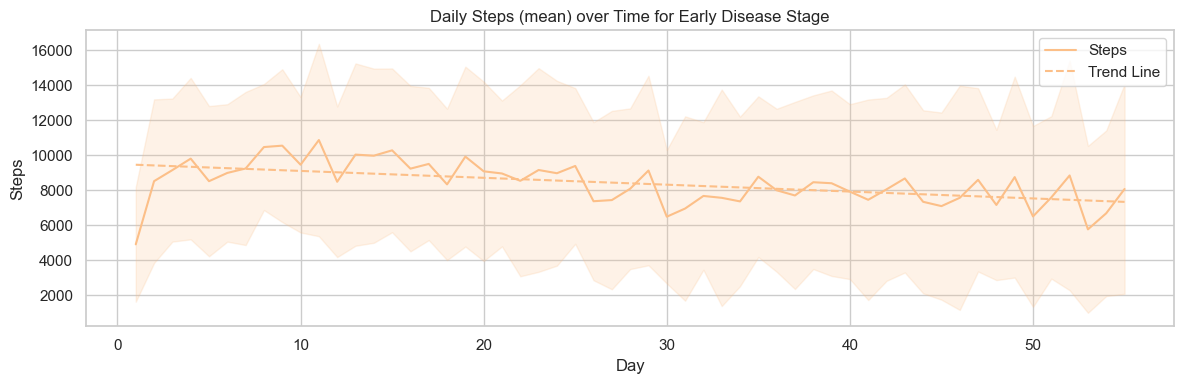

Slope of the trendline for Fast Disease Progression: -25.08 steps/day


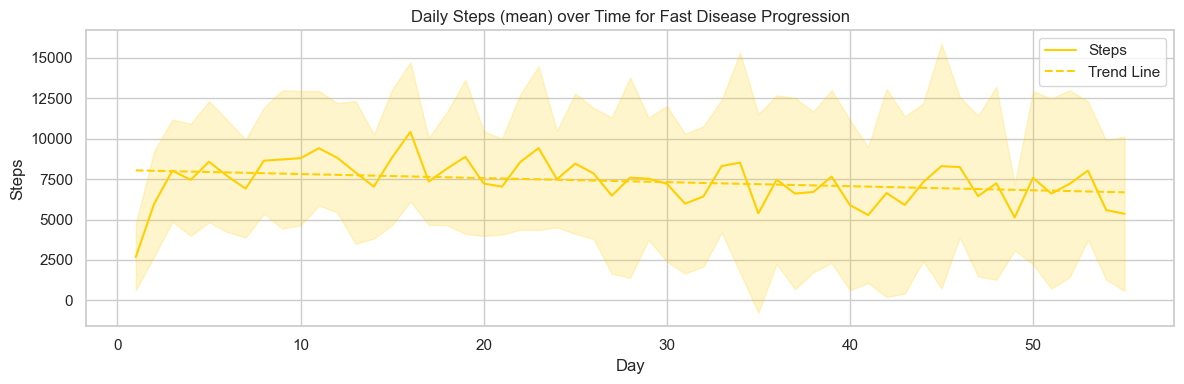

Slope of the trendline for Late Disease Stage: -54.34 steps/day


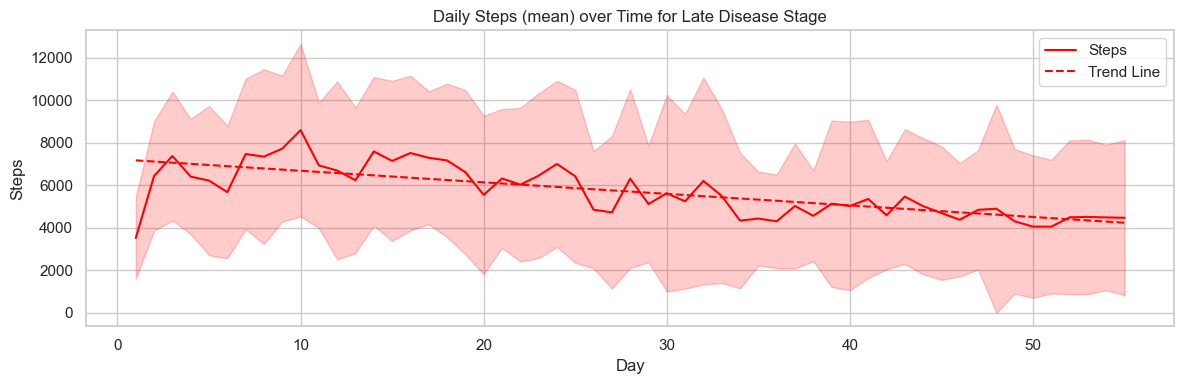

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

skip_participant = [4063, 2854]

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    if participant_id in skip_participant:
        continue
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date
all_data['days_from_start'] = all_data.groupby('participant_id')['date'].transform(lambda x: (x - x.min()).dt.days + 1)

# Remove rows where steps are NaN
all_data = all_data.dropna(subset=['steps'])

# Compute daily steps for each participant per day
participant_daily_data = all_data.groupby(['participant_id', 'disease_type', 'days_from_start']).agg({
    'steps': 'sum'
}).reset_index()

# Filter the data to include only days up to day 55
participant_daily_data = participant_daily_data[participant_daily_data['days_from_start'] <= 55]

# Now group by disease_type and days_from_start to calculate the mean, std, and count (N) across participants
grouped = participant_daily_data.groupby(['disease_type', 'days_from_start']).agg({
    'steps': ['mean', 'std', 'count']
}).reset_index()

# Flatten MultiIndex columns
grouped.columns = ['disease_type', 'days_from_start', 'steps_mean', 'steps_std', 'steps_N']

# Define colors for each disease type using a refined color palette
colors = {
    'Early Disease Stage': '#fcbf88',
    'Fast Disease Progression': '#FFD000',
    'Late Disease Stage': '#FF0000'
}

# Plotting the trends with trend lines for each disease type and printing the slopes
for disease_type, color in colors.items():
    disease_data = grouped[grouped['disease_type'] == disease_type]

    plt.figure(figsize=(12, 4))

    # Steps over time
    plt.plot(disease_data['days_from_start'], disease_data['steps_mean'], label='Steps', color=color)
    plt.fill_between(disease_data['days_from_start'], disease_data['steps_mean'] - disease_data['steps_std'], disease_data['steps_mean'] + disease_data['steps_std'], color=color, alpha=0.2)
    # Adding trend line
    steps_trend = np.polyfit(disease_data['days_from_start'], disease_data['steps_mean'], 1)
    plt.plot(disease_data['days_from_start'], np.polyval(steps_trend, disease_data['days_from_start']), color=color, linestyle='--', label='Trend Line')
    plt.xlabel('Day')
    plt.ylabel('Steps')
    plt.title(f'Daily Steps (mean) over Time for {disease_type}')
    plt.legend()
    
    # Print the slope of the trend line
    slope = steps_trend[0]
    print(f"Slope of the trendline for {disease_type}: {slope:.2f} steps/day")

    plt.tight_layout()
    plt.show()


# Weekly view

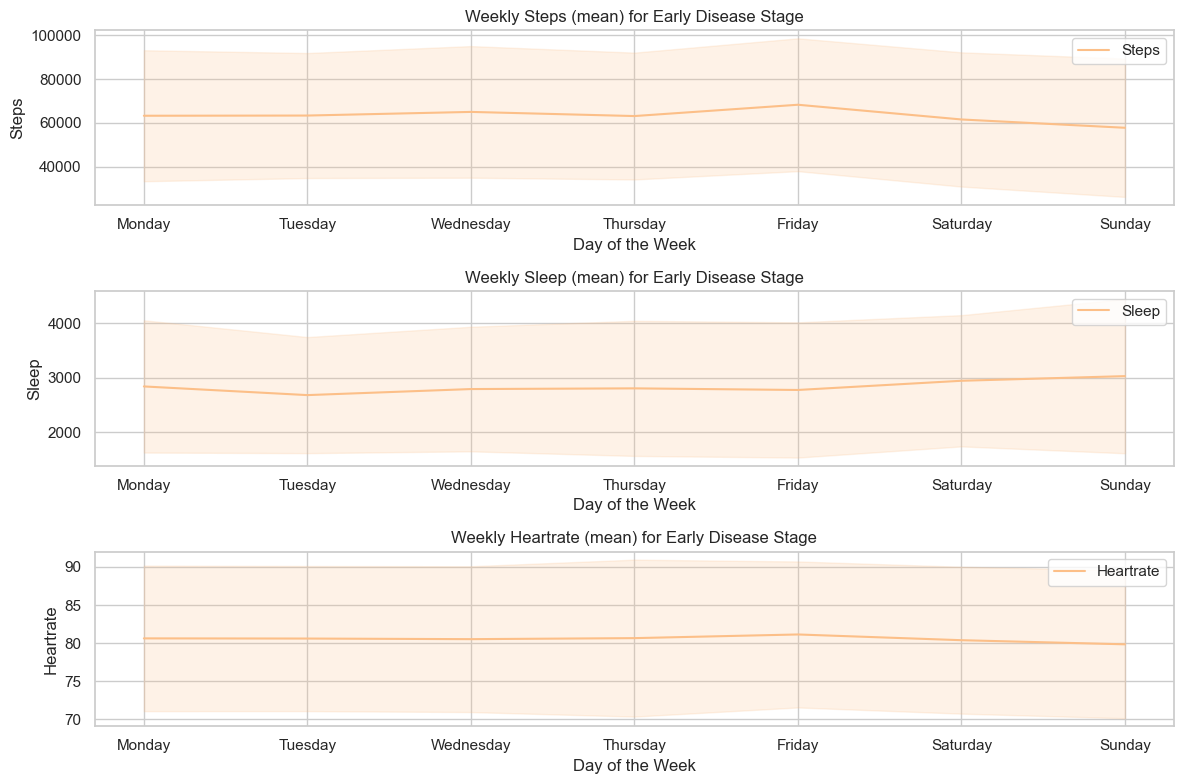

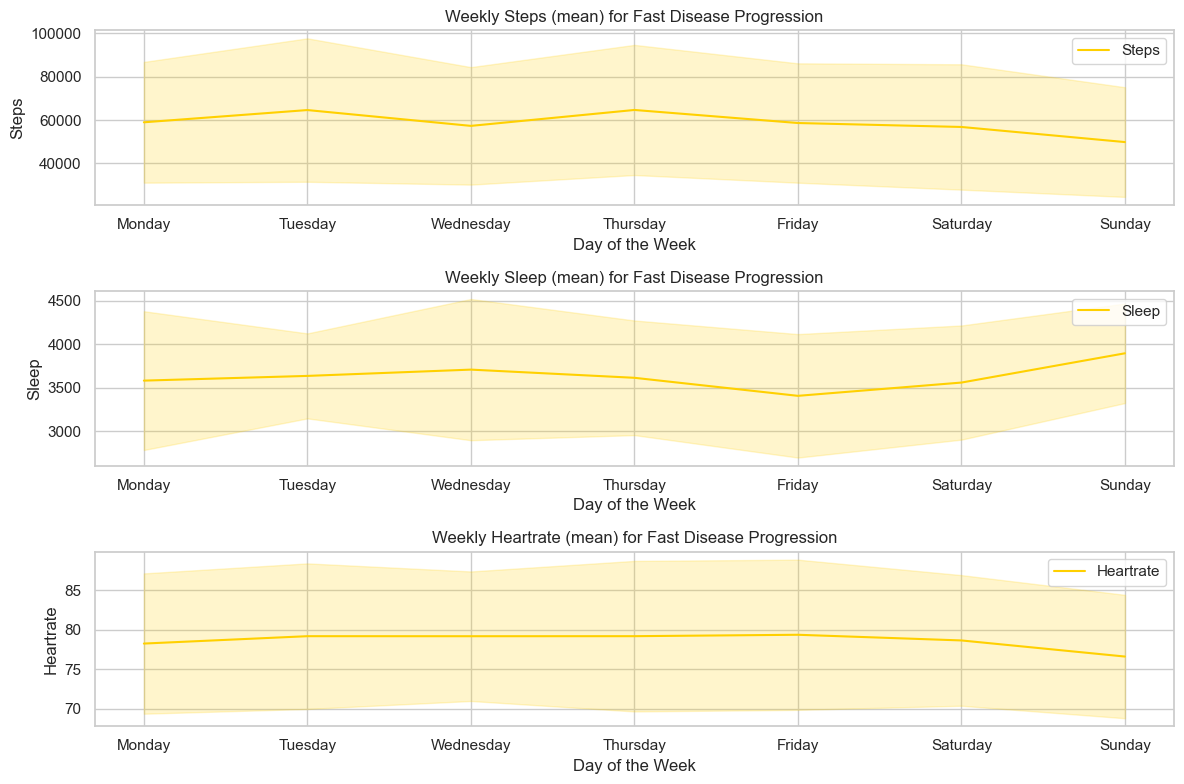

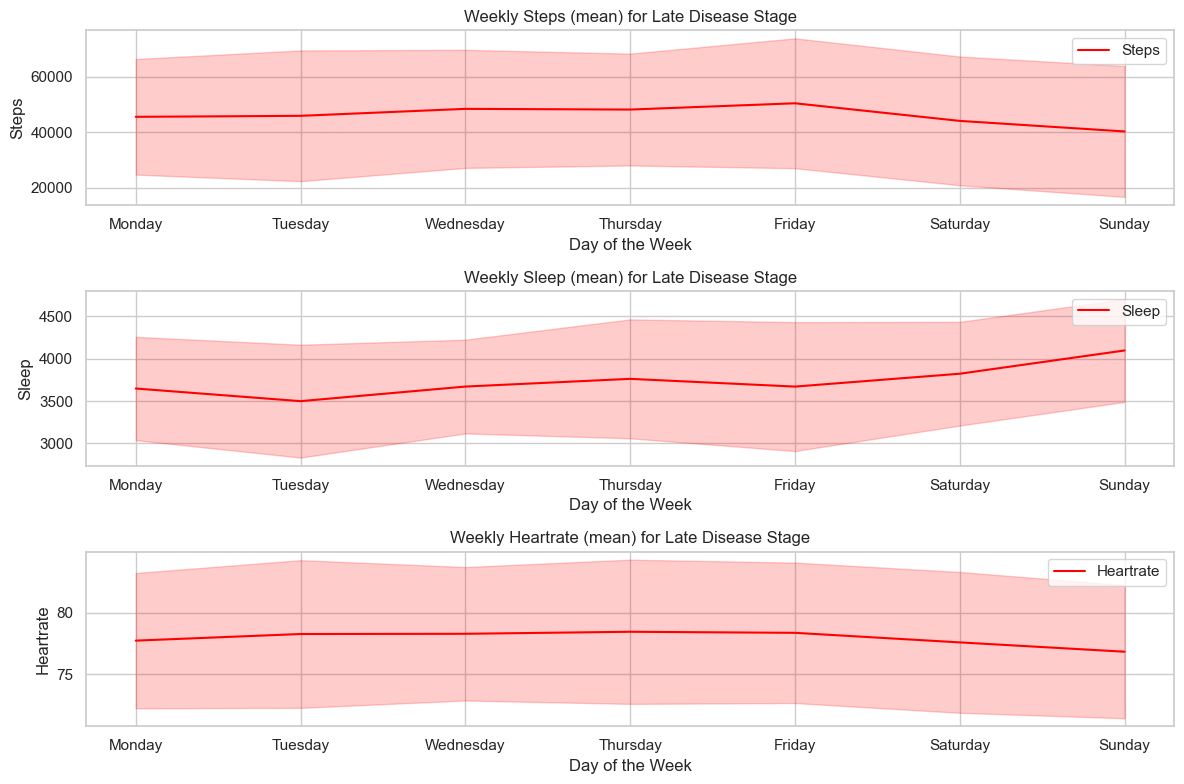

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

skip_participant = [4063, 2854]

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    if participant_id in skip_participant:
        continue
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        data['day_of_week'] = data['time'].dt.day_name()  # Extract day of the week
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Remove rows where heartrate is NaN
all_data = all_data.dropna(subset=['heartrate'])

# Group by participant_id, disease_type, and day_of_week to sum steps and sleep per participant per day of the week
participant_weekly_data = all_data.groupby(['participant_id', 'disease_type', 'day_of_week']).agg({
    'steps': 'sum',
    'sleep': 'sum',
    'heartrate': 'mean'
}).reset_index()

# Now group by disease_type and day_of_week to calculate the mean, std, and count (N) across participants
grouped = participant_weekly_data.groupby(['disease_type', 'day_of_week']).agg({
    'steps': ['mean', 'std', 'count'],
    'sleep': ['mean', 'std', 'count'],
    'heartrate': ['mean', 'std', 'count']
}).reset_index()

# Flatten MultiIndex columns
grouped.columns = ['disease_type', 'day_of_week', 'steps_mean', 'steps_std', 'steps_N', 'sleep_mean', 'sleep_std', 'sleep_N', 'heartrate_mean', 'heartrate_std', 'heartrate_N']

# Define colors for each disease type using a refined color palette
colors = {
    'Early Disease Stage': '#fcbf88',
    'Fast Disease Progression': '#FFD000',
    'Late Disease Stage': '#FF0000'
}

# Define the order of the days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the trends with trend lines for each disease type
for disease_type, color in colors.items():
    disease_data = grouped[grouped['disease_type'] == disease_type].copy()
    disease_data['day_of_week'] = pd.Categorical(disease_data['day_of_week'], categories=days_order, ordered=True)
    disease_data = disease_data.sort_values('day_of_week')

    plt.figure(figsize=(12, 8))

    # Steps over time
    plt.subplot(3, 1, 1)
    plt.plot(disease_data['day_of_week'], disease_data['steps_mean'], label='Steps', color=color)
    plt.fill_between(disease_data['day_of_week'], disease_data['steps_mean'] - disease_data['steps_std'], disease_data['steps_mean'] + disease_data['steps_std'], color=color, alpha=0.2)
    plt.xlabel('Day of the Week')
    plt.ylabel('Steps')
    plt.title(f'Weekly Steps (mean) for {disease_type}')
    plt.legend()

    # Sleep over time
    plt.subplot(3, 1, 2)
    plt.plot(disease_data['day_of_week'], disease_data['sleep_mean'], label='Sleep', color=color)
    plt.fill_between(disease_data['day_of_week'], disease_data['sleep_mean'] - disease_data['sleep_std'], disease_data['sleep_mean'] + disease_data['sleep_std'], color=color, alpha=0.2)
    plt.xlabel('Day of the Week')
    plt.ylabel('Sleep')
    plt.title(f'Weekly Sleep (mean) for {disease_type}')
    plt.legend()

    # Heartrate over time
    plt.subplot(3, 1, 3)
    plt.plot(disease_data['day_of_week'], disease_data['heartrate_mean'], label='Heartrate', color=color)
    plt.fill_between(disease_data['day_of_week'], disease_data['heartrate_mean'] - disease_data['heartrate_std'], disease_data['heartrate_mean'] + disease_data['heartrate_std'], color=color, alpha=0.2)
    plt.xlabel('Day of the Week')
    plt.ylabel('Heartrate')
    plt.title(f'Weekly Heartrate (mean) for {disease_type}')
    plt.legend()

    plt.tight_layout()
    plt.show()


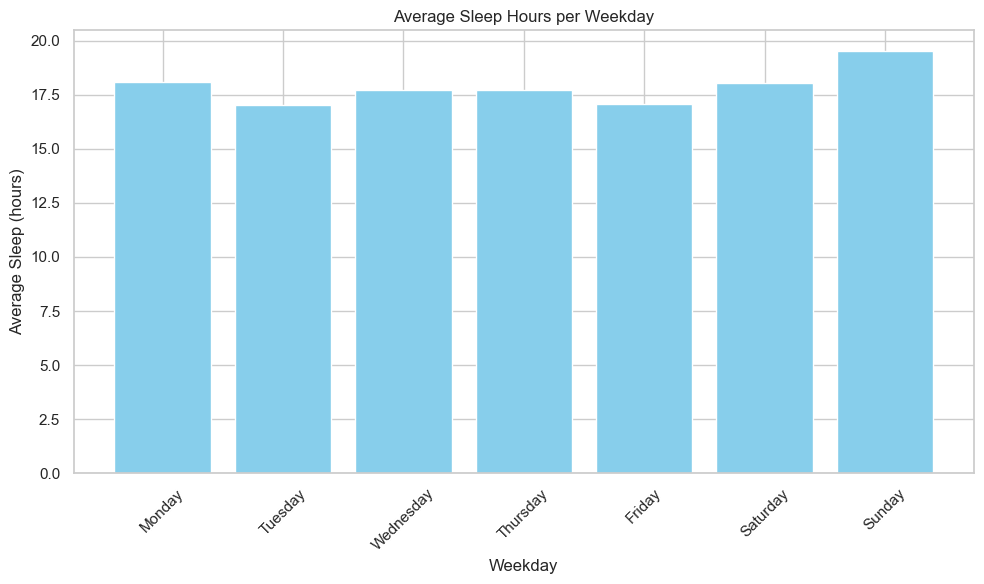

     weekday      sleep
1     Monday  18.105643
5    Tuesday  17.025214
6  Wednesday  17.696360
4   Thursday  17.721472
0     Friday  17.081462
2   Saturday  18.058370
3     Sunday  19.495492


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the overview CSV
overview_df = pd.read_csv('ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'./Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Normalize the start date for each participant
all_data['date'] = all_data['time'].dt.date

# Extract the weekday from the date
all_data['weekday'] = all_data['time'].dt.day_name()

# Group by weekday and calculate the mean sleep for each weekday
weekday_sleep_means = all_data.groupby('weekday')['sleep'].mean().reset_index()

# Sort the weekdays to ensure they appear in the correct order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sleep_means['weekday'] = pd.Categorical(weekday_sleep_means['weekday'], categories=weekday_order, ordered=True)
weekday_sleep_means = weekday_sleep_means.sort_values('weekday')

# Plot the average sleep hours per weekday
plt.figure(figsize=(10, 6))
plt.bar(weekday_sleep_means['weekday'], weekday_sleep_means['sleep'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Average Sleep (hours)')
plt.title('Average Sleep Hours per Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the results
print(weekday_sleep_means)
